<a href="https://colab.research.google.com/github/as2c/MLP---Cosmology/blob/main/NN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code, our objective is to train some neural network models on our test data.

### Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import timeit
import time
%alias_magic t timeit

plt.style.use('seaborn-talk')

from matplotlib import rcParams

# import warnings filter
from warnings import simplefilter 
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [ ]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 18
plt.rc('figure', figsize=(10,6))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

# Import phase I data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/density_contrast_final2.csv')
data['in_halo'] = (data['haloID']>0).astype('int')
data

id  haloID  dc for 4.9  ...  dc for 18.1  dc for 20.0  in_halo
0      12445545     460   -0.088540  ...     0.007345     0.010225        1
1       9757813       0   -0.122652  ...    -0.018459    -0.016116        0
2       4364083       0   -0.104821  ...    -0.017630    -0.011555        0
3       9111430       0   -0.125753  ...     0.003113     0.001856        0
4       2698019       0   -0.126528  ...    -0.011659    -0.007534        0
...         ...     ...         ...  ...          ...          ...      ...
99995   5727559       0   -0.123169  ...    -0.016714    -0.014037        0
99996  13779938       0   -0.127820  ...     0.005973     0.006516        0
99997   5313693       0   -0.127820  ...    -0.006414    -0.002183        0
99998   7482364       0   -0.127820  ...    -0.014278    -0.012175        0
99999   8333714       0   -0.127820  ...    -0.000233     0.005657        0

[100000 rows x 12 columns]

In [ ]:
data.describe()

id         haloID  ...    dc for 20.0        in_halo
count  1.000000e+05  100000.000000  ...  100000.000000  100000.000000
mean   8.336331e+06      73.518370  ...      -0.004292       0.116210
std    3.601997e+06     236.832955  ...       0.011231       0.320478
min    2.130504e+06       0.000000  ...      -0.045462       0.000000
25%    5.190622e+06       0.000000  ...      -0.011502       0.000000
50%    8.323708e+06       0.000000  ...      -0.004137       0.000000
75%    1.143864e+07       0.000000  ...       0.003168       0.000000
max    1.464666e+07    1233.000000  ...       0.033879       1.000000

[8 rows x 12 columns]

### Visualize Data

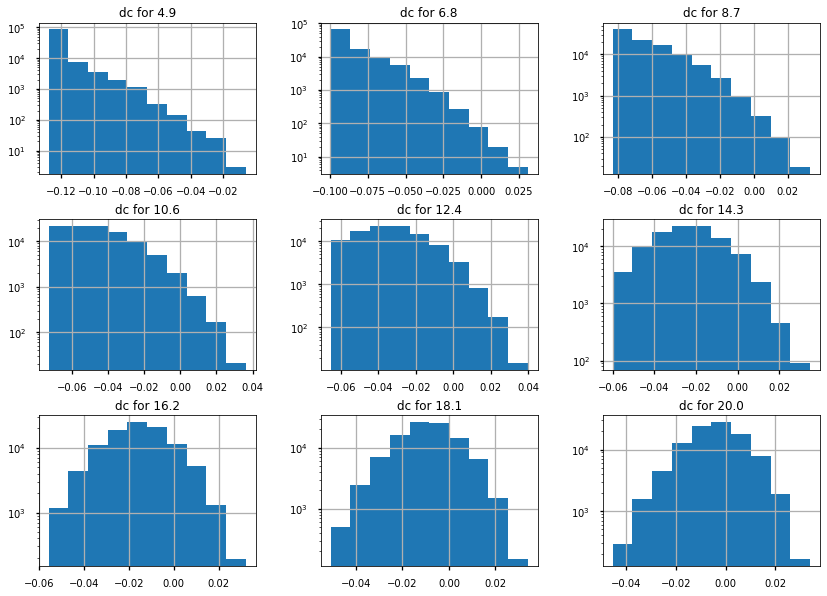

In [ ]:
data.iloc[:,2:11].hist(figsize=(14,10), log=True)
plt.show()

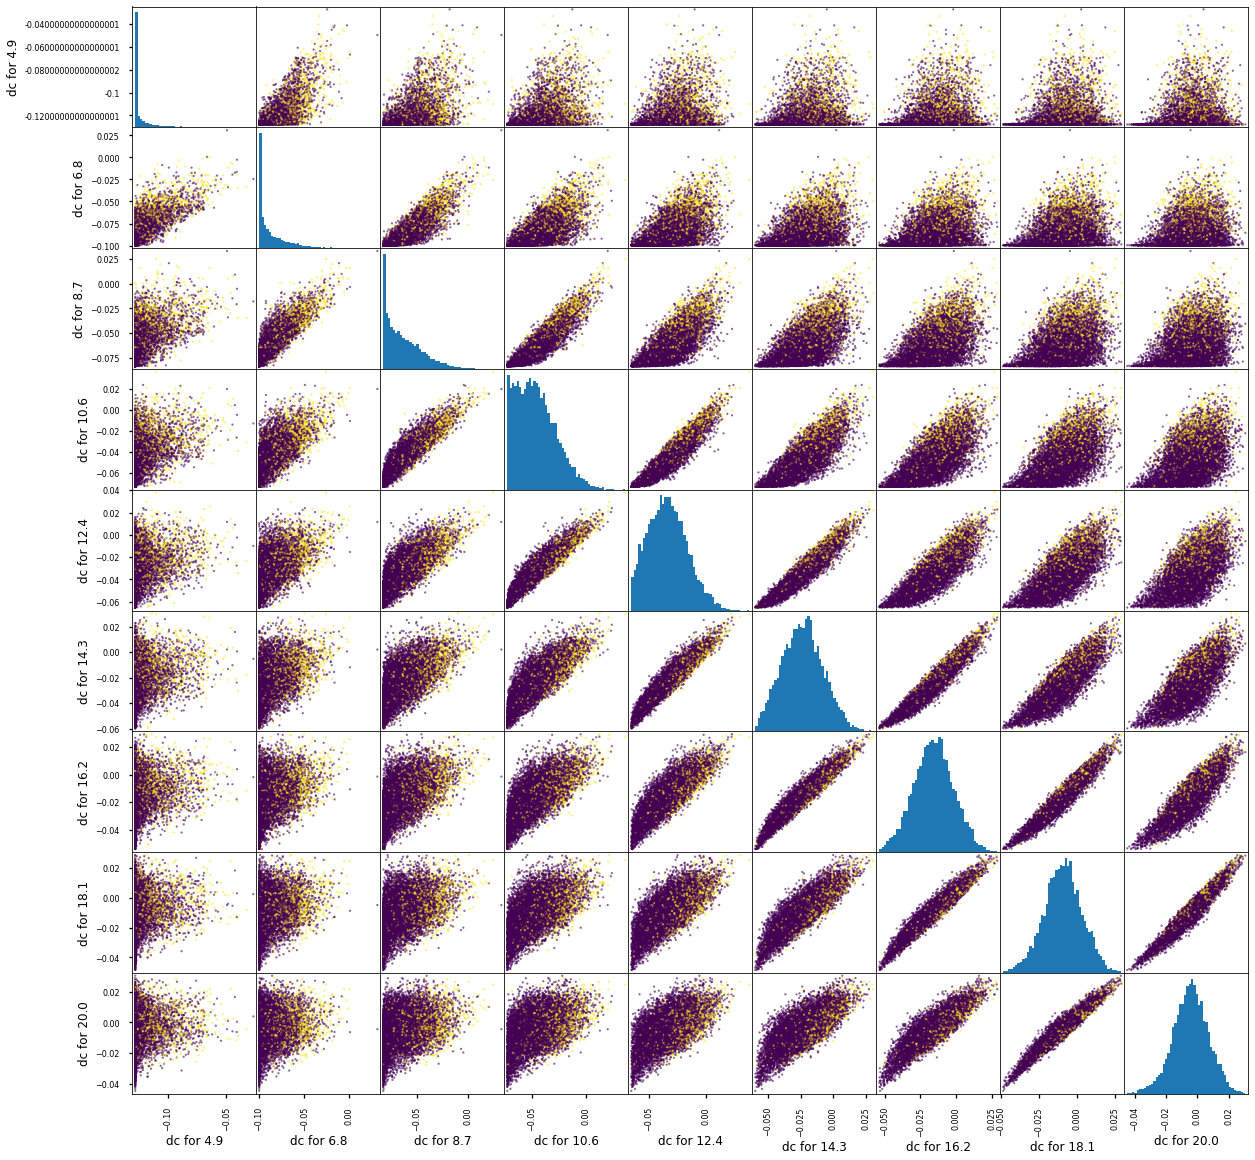

In [ ]:
N_sample=10_000
data_mini = data.sample(N_sample , random_state=0)
target = 'in_halo'

_=pd.plotting.scatter_matrix(data_mini.iloc[:,2:11], c=data_mini[target] , cmap = plt.cm.viridis,
                            figsize=(20,20), marker='o', s=5, 
                            hist_kwds={'bins':50} , alpha = .6)

### Define Datasets

In [ ]:
data = data.sort_values( by =['dc for 12.4'])
X, Y = data.iloc[:,2:11], data.in_halo

In [ ]:
# Frequency of 1-class
print("{} % of the stored data has class 1 ".format(100*Y.sum()/len(Y)))

11.621 % of the stored data has class 1 


In [ ]:
# Scale data
# You may skip this

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

s_scaler = StandardScaler()
# m_scaler = MinMaxScaler()
# r_scaler = RobustScaler()

X = s_scaler.fit_transform(X)
# X = m_scaler.fit_transform(X)
# X = r_scaler.fit_transform(X)

In [ ]:
tst_size = 0.2
ns, nf = np.shape(X) 
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X_train :',len(X_train),'   X_test :',len(X_test))

X_train : 80000    X_test : 20000


In [ ]:
X_test,X_train = np.array(X_test),np.array(X_train)
Y_test,Y_train = np.array(Y_test),np.array(Y_train)
X ,Y= np.array(X),np.array(Y)
n_halo = len(set(data.haloID))
print(n_halo)

643


## Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
x_tr = torch.from_numpy(X_train).float()
x_ts = torch.from_numpy(X_test).float()

y_tr = torch.from_numpy(Y_train)
y_ts = torch.from_numpy(Y_test)

n_w = x_tr[0].size()
n_out = 10

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(9, 30)  
        self.fc2 = nn.Linear(30, 90)
        self.fc3 = nn.Linear(90, n_halo)

    def forward(self, x):
        # x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        output = F.softmax(x, dim=1)

        return output

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=9, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=90, bias=True)
  (fc3): Linear(in_features=90, out_features=643, bias=True)
)


## Simple Training

In [ ]:
net = Net()

optimizer = optim.Adam(net.parameters(), lr=.01, betas=(0.9, 0.999))

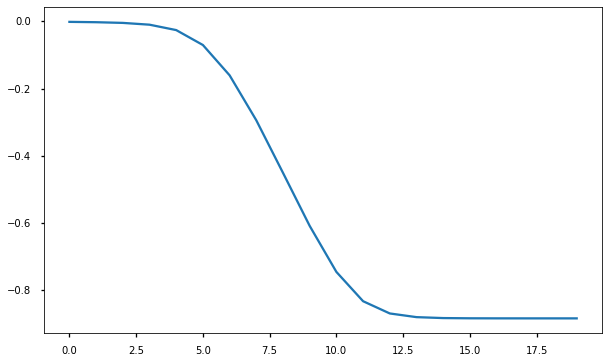

CPU times: user 40.9 s, sys: 2.48 s, total: 43.4 s
Wall time: 44.6 s


In [ ]:
%%time
epochs = 20

#We also need to keep track of the loss. 
losses = []

for i in range(epochs):
    #Clear the previous gradients
    optimizer.zero_grad()
    
    #Precit the output for Given input
    y_pred = net.forward(x_tr)
    
    loss = F.nll_loss(y_pred, y_tr)
    losses += [loss]

    loss.backward()
    optimizer.step()
    
plt.plot(losses)
plt.show()

In [ ]:
ind = np.random.randint(0, len(x_ts))
print(ind)
# plt.imshow(x_ts[ind] )
pred = net.forward(x_ts[ind].view(-1,32,32)).argmax()
print(f'This sample is a {pred}.\n')

4717


RuntimeError: ignored

## Minibatch

Let's add mini-batch optimization and keep track of the accuracy.

In [ ]:
# del net
net = Net()
optimizer = optim.Adam(net.parameters(), lr=.01)
criterion = nn.NLLLoss()

In [ ]:
x_tr = torch.from_numpy(X_train).float()
x_ts = torch.from_numpy(X_test).float()

y_tr = torch.from_numpy(Y_train)
y_ts = torch.from_numpy(Y_test)

In [ ]:
(net.forward(x_ts).argmax(axis=1)==y_ts).sum()/len(y_ts)
# net.forward(x_ts).argmax(axis=1)

tensor(0.)

In [ ]:
n_epoch=3
btch_size = 1000

### Data Loaders

In [ ]:
## Training data
training_dataset = torch.utils.data.TensorDataset(x_tr, y_tr)
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=btch_size, shuffle=True)

## Test data
test_dataset = torch.utils.data.TensorDataset(x_ts, y_ts)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=btch_size, shuffle=True)

In [ ]:
training_dataset[0]

(tensor([-0.4751,  0.3193,  0.3980,  0.6439,  0.9173,  1.1461,  1.2638,  1.0930,
          1.1660]), tensor(0))

In [ ]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
for x, y in train_loader:
  print(x.size() )
  # plt.imshow(x[0].numpy())
  print(y[0])
  break

torch.Size([1000, 9])
tensor(0)


### Training

In [ ]:
%%time
# epochs = 3
# batch_size = 500
n_s = len(x_tr)
n_ts = len(x_ts)


#We also need to keep track of the loss. 
sample_rate = 10
training_losses = []
test_losses = []

training_accuracy = []
test_accuracy = []

for i in range(n_epoch):
  print(f'Starting {i} epoch.')
  # print(len(training_losses))
  ind = 0

  for i, (X_batch, Y_batch) in enumerate(train_loader):
    # X_batch = X_batch.reshape(-1, n_w*n_h)#.to(device)
    Y_batch = Y_batch#.to(device)
    ind += 1

    # Forward pass
    # #Precit the output for Given input
    outputs = net(X_batch)
    loss = criterion(outputs, Y_batch)
    
    # Backward and optimize
    #Clear the previous gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ## Every sample_rate, we record the loss and accuracy. 
    if ind%(int(n_s/btch_size/sample_rate))==0:
      y_tr_pred = net.forward(x_tr)
      training_losses += [F.nll_loss( y_tr_pred, y_tr).item() ]
      training_accuracy += [torch.sum( y_tr == 
                                      torch.argmax( y_tr_pred, axis=1 ) ).item()/n_s ]

      # print(F.nll_loss( net.forward(x_ts) , y_ts) )
      y_ts_pred = net.forward(x_ts)
      test_losses += [F.nll_loss( y_ts_pred, y_ts).item() ]
      test_accuracy += [torch.sum( y_ts == 
                                      torch.argmax( y_ts_pred, axis=1 )).item()/n_ts ]





Starting 0 epoch.
Starting 1 epoch.
Starting 2 epoch.
CPU times: user 57.8 s, sys: 798 ms, total: 58.6 s
Wall time: 58.6 s


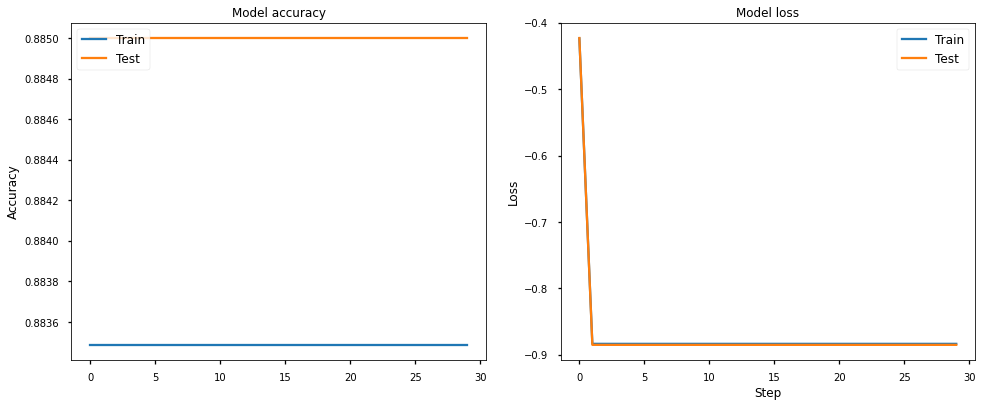

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(training_accuracy)
plt.plot(test_accuracy)
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss', xlabel = 'Step')
plt.plot(training_losses)
plt.plot(test_losses )
plt.legend(['Train', 'Test'], loc=0)

plt.tight_layout()
plt.show()

## GPU

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

n_epoch=3
btch_size = 1000

x_tr = torch.from_numpy(X_train).float()
x_ts = torch.from_numpy(X_test).float()

y_tr = torch.from_numpy(Y_train)
y_ts = torch.from_numpy(Y_test)

## Training data
training_dataset = torch.utils.data.TensorDataset(x_tr, y_tr)
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=btch_size, shuffle=True)

## Test data
test_dataset = torch.utils.data.TensorDataset(x_ts, y_ts)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=btch_size, shuffle=True)




In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
%%time
n_w = x_tr[0].size()
n_s = len(x_tr)
n_ts = len(x_ts)


#We also need to keep track of the loss. 
sample_rate = 20
training_losses = []
test_losses = []

training_accuracy = []
test_accuracy = []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# model = NeuralNet(n_w * n_h, [100,80], 10).to(device)
model = Net().to(device)

# Loss and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=.01)

# Train the model
total_step = len(train_loader)
for epoch in range(n_epoch):
    print(f'Starting {epoch} epoch.')

    for i, (X_batch, Y_batch) in enumerate(train_loader):  
        # Move tensors to the configured device
        # X_batch = X_batch.reshape(-1, n_w).to(device)
        Y_batch = Y_batch.to(device)
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            

        ## Every sample_rate, we record the loss and accuracy. 
        if i%(int(n_s/btch_size/sample_rate))==0:
          y_tr_pred = model.forward(x_tr.to(device)).cpu()
          training_losses += [F.nll_loss( y_tr_pred, y_tr).item() ]
          training_accuracy += [torch.sum( y_tr == 
                                          torch.argmax( y_tr_pred, axis=1 ) ).item()/n_s ]

          # print(F.nll_loss( net.forward(x_ts) , y_ts) )
          y_ts_pred = model.forward(x_ts.to(device)).cpu()
          test_losses += [F.nll_loss( y_ts_pred, y_ts).item() ]
          test_accuracy += [torch.sum( y_ts == 
                                          torch.argmax( y_ts_pred, axis=1 )).item()/n_ts ]
      

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, Y_batch in test_loader:
        X_batch = X_batch.to(device)
        Y_batch = Y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += Y_batch.size(0)
        correct += (predicted == Y_batch).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Starting 0 epoch.
Starting 1 epoch.
Starting 2 epoch.
Accuracy of the network on the 10000 test images: 88.5 %
CPU times: user 1min 26s, sys: 1.04 s, total: 1min 27s
Wall time: 1min 27s


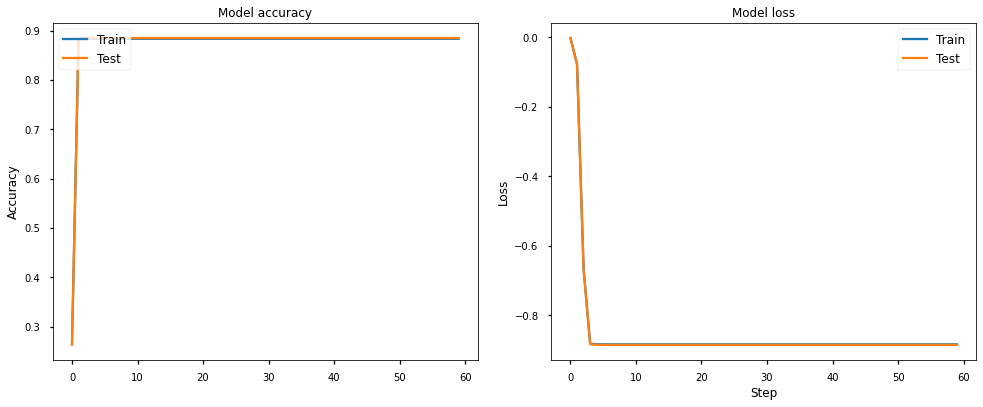

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(training_accuracy)
plt.plot(test_accuracy)
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss', xlabel = 'Step')
plt.plot(training_losses)
plt.plot(test_losses )
plt.legend(['Train', 'Test'], loc=0)

plt.tight_layout()
plt.show()